**Load necessary modules**

In [1]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import matplotlib.pyplot as plt
import surrogate as sr
import sample as sm

**Visualize a system of linear inequalities as a feasible region**

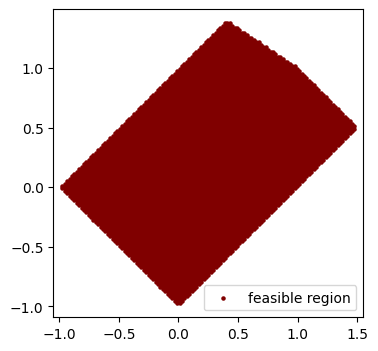

In [2]:
# # the inequlaities can be represented as Ax <= b1 & Ax >= b0
A, b1, b0 = np.array([[1., -1.], [2., 3.], [1., 1.]]), np.array([1., 5., 2.]), np.array([-1., -5., -1.])
sampler0 = sm.InequalitySampler0(A, b0, b1)
sampler0.show_feasible(lims=(-3., 3.));

**Calculate the intersection of a line with the feasible region**

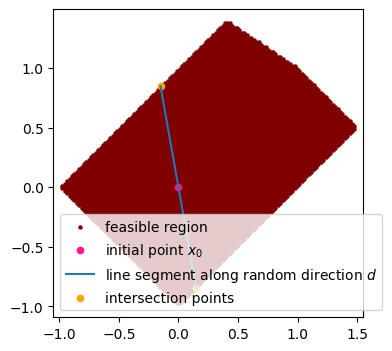

In [3]:
x0 = np.zeros(2)
d = np.random.normal(size=2)
d /= np.linalg.norm(d)
sampler0.intersection_with_bisection(x0, d);
sampler0.show_intersection(lims=(-3., 3.));

**Run the hit and run algorithm to sample points from the feasible region**

Time taken by sample is 0.1545 seconds


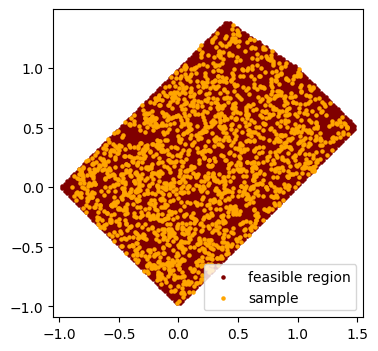

In [6]:
sampler0.sample(2000, steps=1);
sampler0.show_sample(lims=(-3., 3.));
# np.sum(sampler0.is_feasible_m(sampler0.X))

**$\{Ax< b\}$ is a convex domain and therefore easy to sample. $\{|Ax+b|<M\} = \{Ax+b < M\}\cap\{Ax+b > -M\} = \{Ax < M-b\}\cap\{-Ax<M+b\}$. As an interesction of convex sets $\{|Ax+b|<M\}$ is also convex and therefore is easy to sample from! Let's look at a case when $|b|<M$.**

Time taken by sample is 1.3962 seconds


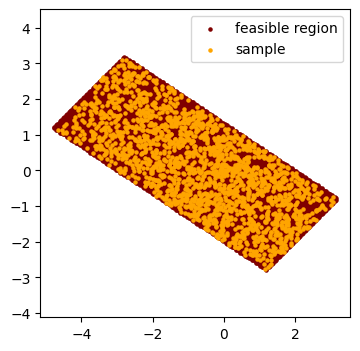

In [10]:
sampler1 = sm.InequalitySampler1(A, b=np.array([1., 1., 2.]), M=5.)
sampler1.sample(2000, steps=10);
sampler1.show_sample(lims=(-6., 6.));

**But sadly, $\{|Ax+b|\ngtr M\}$ is not equivalent to $\{|Ax+b|\le M\}$ because the vector notation is hiding the fact that we are dealing with multiple inequalities simultaneously. If $A_i$ denotes the $i$-th row of A then $\{|Ax+b|\ngtr M\}=\{|Ax+b|>M\}^c=\bigcup_{i}\{|A_i^\top x + b|\le M\}$ or, $\{|Ax+b|>M\}=\bigcap_{i}\{|A_i^\top x + b|\le M\}^c=\bigcap_{i}\{|A_i^\top x + b|> M\}$. Now the question becomes, is $\{|A_i^\top x+b|>M\}$ convex? Not necessarily, since $\{|A_i^\top x+b|>M\}=\{-A_i^\top x<b-M\}\cup\{A_i^\top x<-b-M\}=$ union of convex sets! And in the same vein, $\{|Ax+b|>M\}$, as an intersection of potentially nonconvex sets, is potentially nonconvex itself! So $\{m<|Ax+b|<M\}=$ convex $\setminus$ nonconvex. Let's try to sample from $\{m<|Ax+b|<M\}$. But before that lets look at the feasible region. In the following we call $\{|Ax+b|<M\}$, the big region and $\{|Ax+b|>m\}^c$, the removed region.**

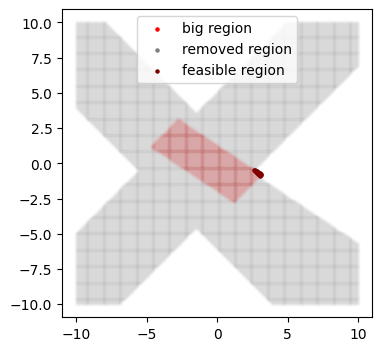

In [6]:
sampler2 = sm.InequalitySampler2(A, b=np.array([1., 1., 2.]), m=4.1, M=5.)
sampler2.show_feasible(lims=[-10., 10.], components=True);

**A slightly zoomed in view of the feasible region**

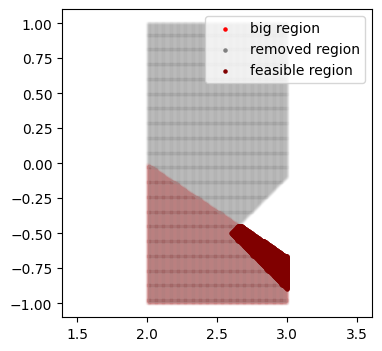

In [7]:
sampler2.show_feasible(lims=[[2., 3.], [-1., 1.]], components=True);

**Due to the nonconvexity of the removed region it's easy to find a 4-tuple $(A, b, m, M)$ such that the $\{m<|Ax+b|<M\}$ has multiple connected components!**

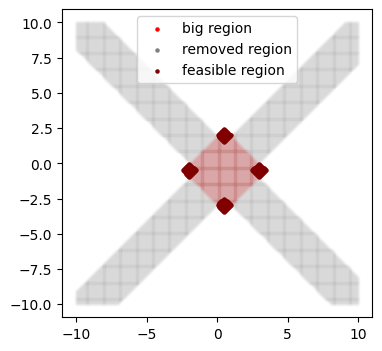

In [8]:
sampler3 = sm.InequalitySampler2(A=[[1., -1.], [1., 1.]], b=[-1., 0.], m=2., M=3.)
sampler3.show_feasible(lims=[-10., 10.], components=True);

**In the last example $|b|<m$, a case where it's not immediately obvious what a token feasible point should be. We can make our lives much easier by considering the case $m<|b|<M$.**

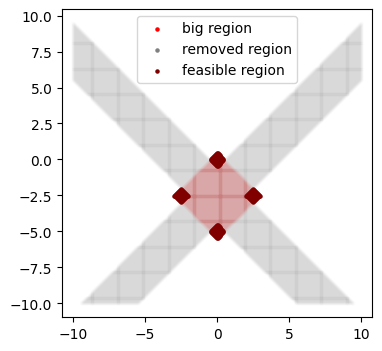

In [9]:
sampler4 = sm.InequalitySampler2(A=[[1., -1.], [1., 1.]], b=[-2.5, 2.5], m=2., M=3.)
sampler4.show_feasible(lims=[-10., 10.], components=True);

**Let's look at an interection for a region of this sort.**

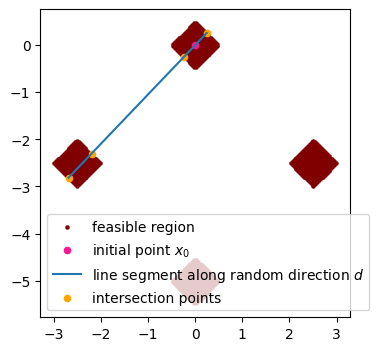

In [10]:
x0 = np.zeros(2)
d = np.array([0.69076607, 0.7230783 ])
d /= np.linalg.norm(d)
sampler4.intersection_with_bisection(x0, d);
sampler4.show_intersection(lims=(-6., 6.));

**Let's look at a hit and run sample on such a region.**

Time taken by sample is 17.12010931968689 seconds


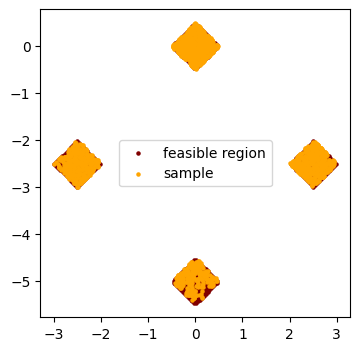

In [18]:
sampler4.sample(2000, steps=1);
sampler4.show_sample(lims=(-6., 6.));